In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

import os
from distutils.dir_util import copy_tree, remove_tree

from PIL import Image
from random import randint

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef as MCC
from sklearn.metrics import balanced_accuracy_score as BAS
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, MaxPool2D



print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.12.0


In [2]:
WORK_DIR = 'C:/Users/JP/Desktop/blood cancer detection/Blood cell Cancer [ALL]/'

CLASSES = [ '[Malignant] early Pre-B',
            '[Malignant] Pre-B',
            '[Malignant] Pr0-B',
            'Benign'
           ]

IMG=224

IMAGE_SIZE = [224, 224]
DIM = (IMG,IMG )

In [3]:
ZOOM = [.99, 1.01]
BRIGHT_RANGE = [0.8, 1.2]
HORZ_FLIP = True
FILL_MODE = "constant"
DATA_FORMAT = "channels_last"

work_dr = IDG(rescale = 1./255, brightness_range=BRIGHT_RANGE, zoom_range=ZOOM, data_format=DATA_FORMAT, fill_mode=FILL_MODE, horizontal_flip=HORZ_FLIP)

train_data_gen = work_dr.flow_from_directory(directory=WORK_DIR, target_size=DIM, batch_size=3242, shuffle=False)

Found 3242 images belonging to 4 classes.


In [4]:
# from random import randint
# def show_images(generator,y_pred=None):
#     """
#     Input: An image generator,predicted labels (optional)
#     Output: Displays a grid of 9 images with lables
# #     """
    
#     # get image lables
#     labels =dict(zip([0,1], CLASSES))
    
#     # get a batch of images
#     x,y = generator.next()
    
#     # display a grid of 9 images
#     plt.figure(figsize=(10, 10))
#     if y_pred is None:
#         for i in range(9):
#             ax = plt.subplot(3, 3, i + 1)
#             idx = randint(0, 3192)
#             plt.imshow(x[idx])
#             plt.axis("off")
#             plt.title("Class:{}".format(labels[np.argmax(y[idx])]))
                                                     
#     else:
#         for i in range(9):
#             ax = plt.subplot(3, 3, i + 1)
#             plt.imshow(x[i])
#             plt.axis("off")
#             plt.title("Actual:{} \nPredicted:{}".format(labels[np.argmax(y[i])],labels[y_pred[i]]))
    
# # Display Train Images
# show_images(train_data_gen)

In [5]:
train_data, train_labels = train_data_gen.next()

In [6]:
print(train_data.shape, train_labels.shape)

(3242, 224, 224, 3) (3242, 4)


In [7]:

train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size = 0.3, random_state=42)

In [8]:
print(train_data.shape, train_labels.shape)

(2269, 224, 224, 3) (2269, 4)


In [9]:
print(val_data.shape, val_labels.shape)

(973, 224, 224, 3) (973, 4)


In [10]:
# def build_model():
#     model = Sequential()
#     model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (48, 48, 3)))
#     model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (48, 48, 3)))
#     model.add(MaxPool2D(pool_size = (2, 2)))
#     model.add(Dropout(0.25))
#     model.add(Flatten())
#     model.add(Dense(256, activation = 'relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(7, activation = 'softmax'))
#     return model

In [11]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.applications import MobileNetV2

In [12]:
base_model = MobileNetV2(weights = 'imagenet', include_top=False, input_shape=(224, 224, 3))


In [13]:
base_model.trainable = False

In [14]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [15]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
import warnings
 

import os
import glob
import matplotlib.pyplot as plt

# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [16]:
MobileNetV2 = tf.keras.models.Sequential()

MobileNetV2.add(base_model)
MobileNetV2.add(GlobalAveragePooling2D())
MobileNetV2.add(Dense(4, activation = 'softmax'))
MobileNetV2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 4)                 5124      
                                                                 
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


In [17]:
MobileNetV2.compile(optimizer= 'adam' , loss= 'categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = MobileNetV2.fit(train_data,
                 train_labels, epochs=5,
                 batch_size = 1,
 validation_data = (val_data, val_labels))

Epoch 1/5
2269/2269 [==============================] - 55s 24ms/step - loss: 0.3004 - accuracy: 0.9022 - val_loss: 0.1829 - val_accuracy: 0.9322
Epoch 2/5
2269/2269 [==============================] - 54s 24ms/step - loss: 0.1174 - accuracy: 0.9617 - val_loss: 0.0860 - val_accuracy: 0.9723
Epoch 3/5
2269/2269 [==============================] - 55s 24ms/step - loss: 0.0771 - accuracy: 0.9744 - val_loss: 0.1046 - val_accuracy: 0.9609
Epoch 4/5
2269/2269 [==============================] - 55s 24ms/step - loss: 0.0574 - accuracy: 0.9819 - val_loss: 0.0843 - val_accuracy: 0.9692
Epoch 5/5
2269/2269 [==============================] - 55s 24ms/step - loss: 0.0460 - accuracy: 0.9833 - val_loss: 0.0782 - val_accuracy: 0.9692


In [19]:
MobileNetV2.save('blood.h5')

In [20]:

from PIL import Image, ImageChops, ImageEnhance
import os
import itertools

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

31/31 [==============================] - 10s 300ms/step


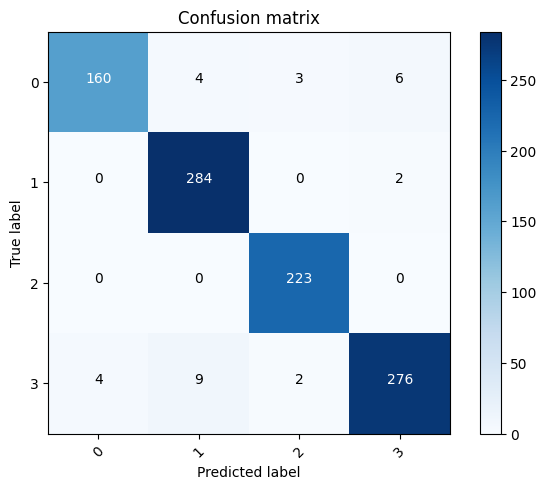

In [22]:
# Predict the values from the validation dataset
Y_pred = MobileNetV2.predict(val_data)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(val_labels,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(4))

In [23]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(Y_true,Y_pred_classes) 
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(Y_true,Y_pred_classes,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(Y_true,Y_pred_classes, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(Y_true,Y_pred_classes, average='micro')
print('F-Measure: %.3f' % score)

Accuracy: 0.969
Precision: 0.966
Recall: 0.969
F-Measure: 0.969


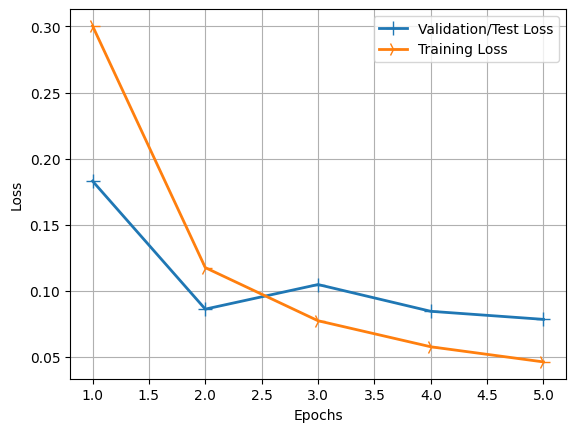

In [24]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

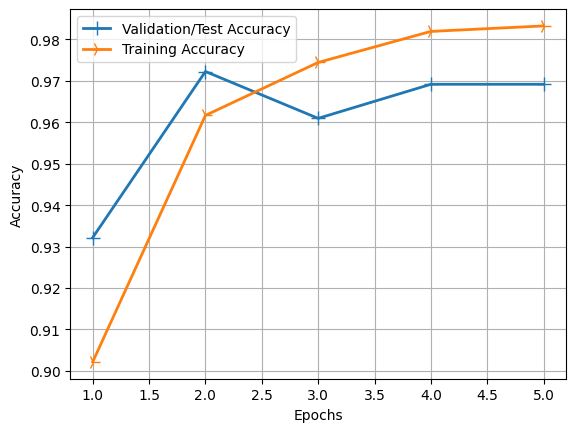

In [25]:
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()